In [ ]:
## INFO180 - Machine Learning | Made by Tor Gunnar H (teh018) @ Jens Vu Bogen (big018)

In [1]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import CategoricalNB

In [2]:
fil = "/Users/OhRLD/Downloads/diabetes.csv"

In [3]:
df = pd.read_csv(fil)

In [4]:
# Specify the correct column names
column_names = [
    'Pregnancy rate', 'Glucose', 'Blood pressure', 'Skin', 'Insulin', 'BMI', 'Diabetes Inheritance function', 'Age', 'Diabetes diagnosis'
]

In [5]:
df.columns = column_names  # Update column names

In [6]:
columns_to_check = df.columns[df.columns != 'Pregnancy'][df.columns != 'Diabetes diagnosis']

In [7]:
df_filtered = df[(df[columns_to_check] != 0).all(axis=1)]

In [8]:
df_filtered
#Gives us an idea of what the values and attributes are in the dataset.

,Pregnancy rate,Glucose,Blood pressure,Skin,Insulin,BMI,Diabetes Inheritance function,Age,Diabetes diagnosis
2,1,89,66,23,94,28.1,0.167,21,0
5,3,78,50,32,88,31.0,0.248,26,1
7,2,197,70,45,543,30.5,0.158,53,1
12,1,189,60,23,846,30.1,0.398,59,1
13,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
750,1,121,78,39,74,39.0,0.261,28,0
754,1,128,88,39,110,36.5,1.057,37,1
759,2,88,58,26,16,28.4,0.766,22,0
762,10,101,76,48,180,32.9,0.171,63,0


In [9]:
# Split the data into features (X) and target attribute, being the actual diagnosis.
X = df_filtered[columns_to_check]
y = df_filtered['Diabetes diagnosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [11]:
# Scale the features using MinMaxScaler.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (k) if needed. 

# K-Nearest Neighbor 1/3

In [13]:
# Train the classifier on the scaled training data
knn_classifier = knn_classifier.fit(X_train_scaled, y_train)

In [14]:
# Retrieve predictions on the dataset
y_pred = knn_classifier.predict(X_test_scaled)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        46
           1       0.65      0.50      0.56        22

    accuracy                           0.75        68
   macro avg       0.72      0.68      0.69        68
weighted avg       0.74      0.75      0.74        68



## Our algorithm managed to get a 74% accuracy using basic scaling and almost zero adjustability. The KNN algorithm is effective right out of the box, but improves drastically when you start to tweak the settings.

In [ ]:
#Considers the most used attributes and displays the most indicative feature. 
correlations = df_filtered[columns_to_check].corrwith(df_filtered['Diabetes diagnosis'])

feature_importance = correlations.abs().sort_values(ascending=False)

print("Feature Importance (Absolute Correlation):\n", feature_importance)

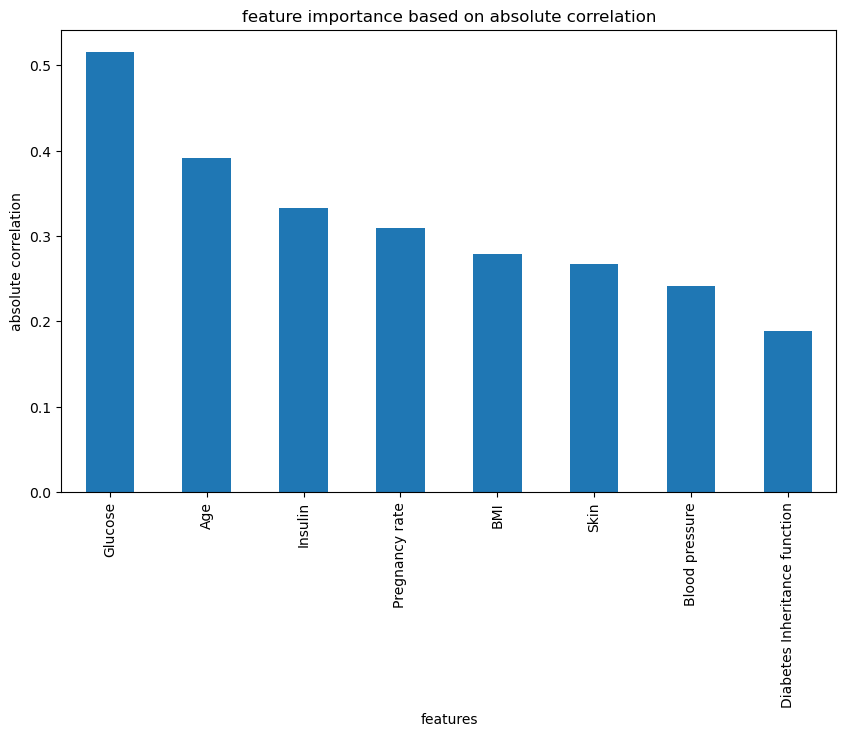

In [17]:
correlations = df_filtered[columns_to_check].corrwith(df_filtered['Diabetes diagnosis'])

#Sorterer features
feature_importance = correlations.abs().sort_values(ascending=False)

#Bruker plt til å vise fram
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('feature importance based on absolute correlation')
plt.xlabel('features')
plt.ylabel('absolute correlation')
plt.show()

### Considers and displays the features and their respective correlation with the target feature

# Naive Bayes 2/3

In [18]:
# Define quartiles for each column
quartiles = np.percentile(df[column_names[:-1]], [25, 50, 75], axis=0)

In [21]:
# Define quartile labels
quartile_labels = ['young', 'quite young', 'quite old', 'old']

In [22]:
# Convert numerical values to quartile categories
for i, col in enumerate(column_names[:-1]):
    df[col] = pd.cut(df[col], bins=[-np.inf] + list(quartiles[:, i]) + [np.inf], labels=quartile_labels, include_lowest=True)

In [23]:
# Split the data into features (X) and target (y)
X = df[column_names[:-1]]
y = df['Diabetes diagnosis']

In [26]:
# Encode the categorical features as integers
encoder = OrdinalEncoder(categories=[quartile_labels] * len(columns_to_check))
X_encoded = encoder.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0, stratify=y)

In [28]:
# Train the Categorical Naive Bayes classifier
categorical_nb_classifier = CategoricalNB()
categorical_nb_classifier.fit(X_train, y_train)

CategoricalNB()

In [29]:
# Get predictions on the test set
y_pred_nb = categorical_nb_classifier.predict(X_test)

In [30]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

In [31]:
print(f'Categorical Naive Bayes Accuracy: {accuracy_nb:.2f}')
print(report_nb)

Categorical Naive Bayes Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       100
           1       0.75      0.74      0.75        54

    accuracy                           0.82       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.82      0.82      0.82       154



## Also, without major adjustments, the Naive Bayes performed even better than the KNN classifier. Here we receive 82% accuracy using the basic paramters for the algorithm.

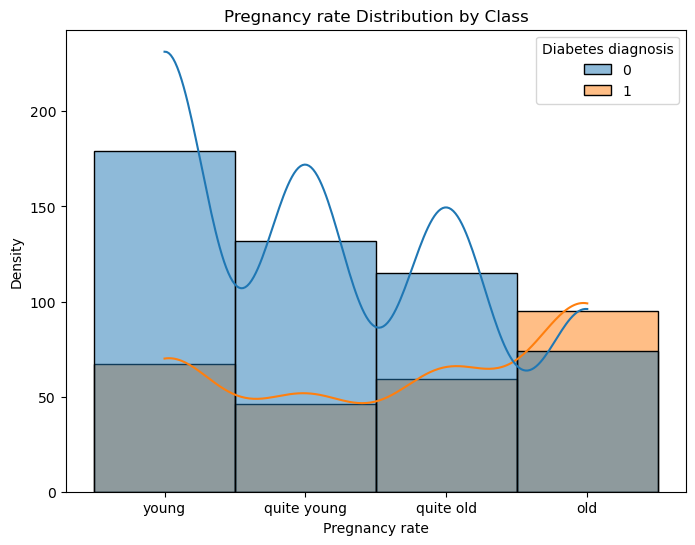

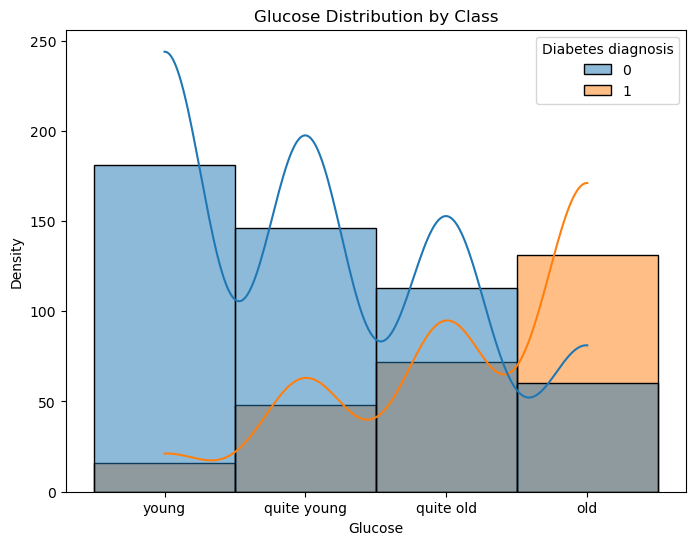

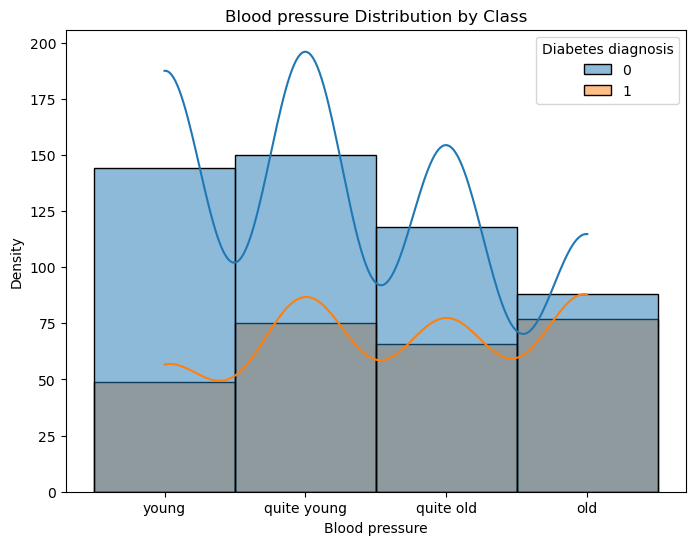

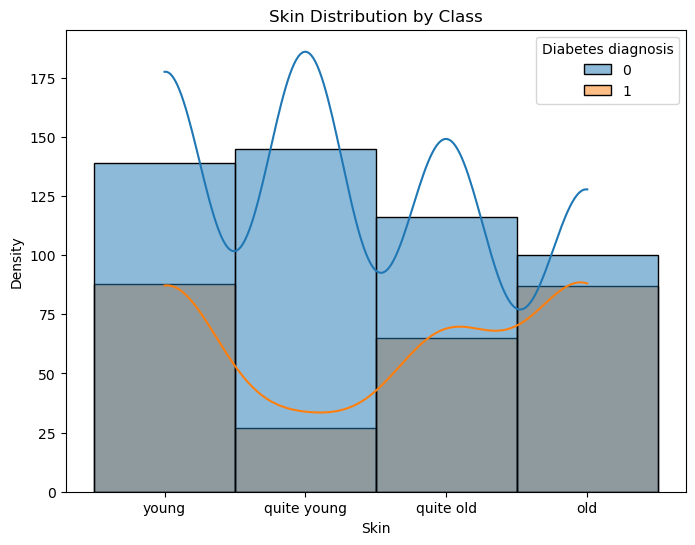

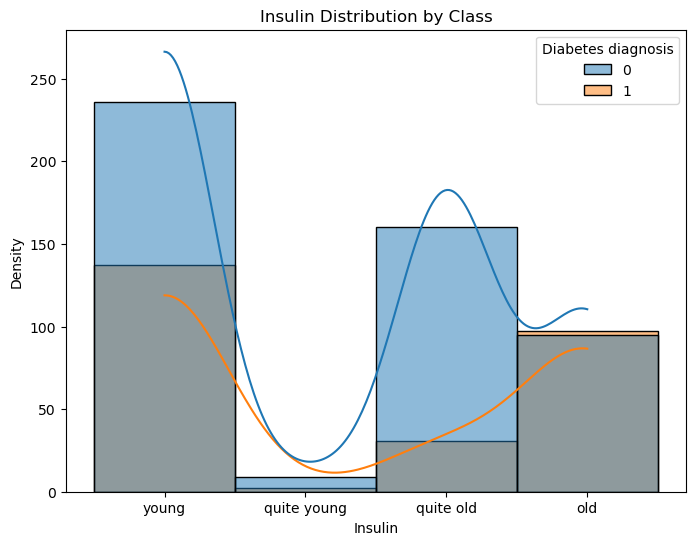

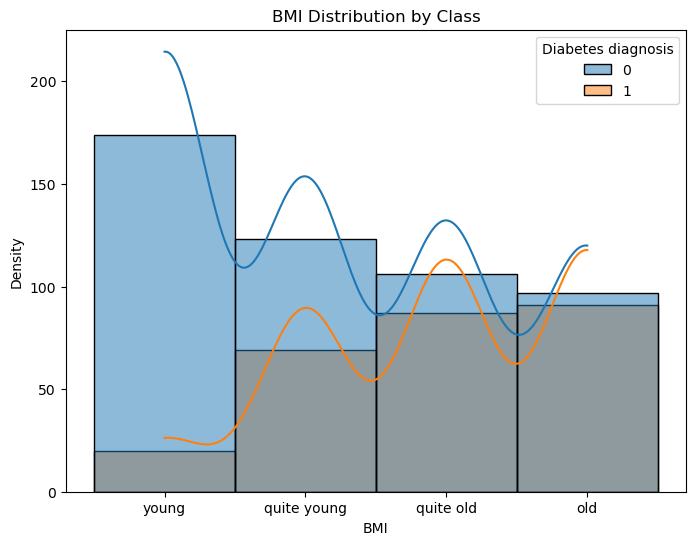

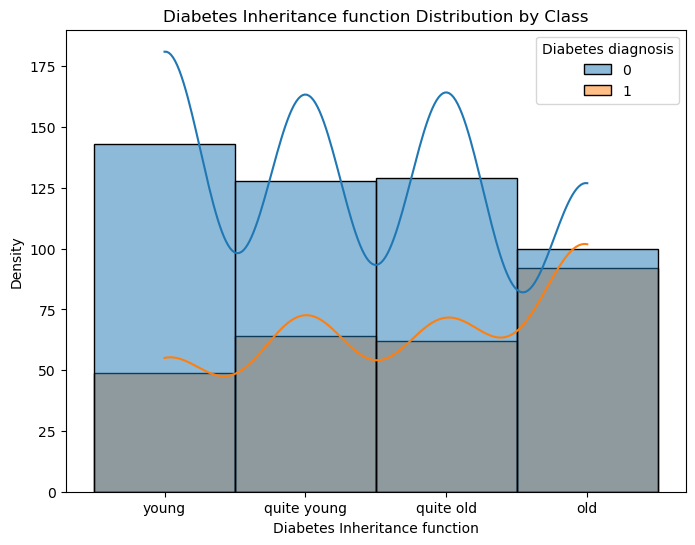

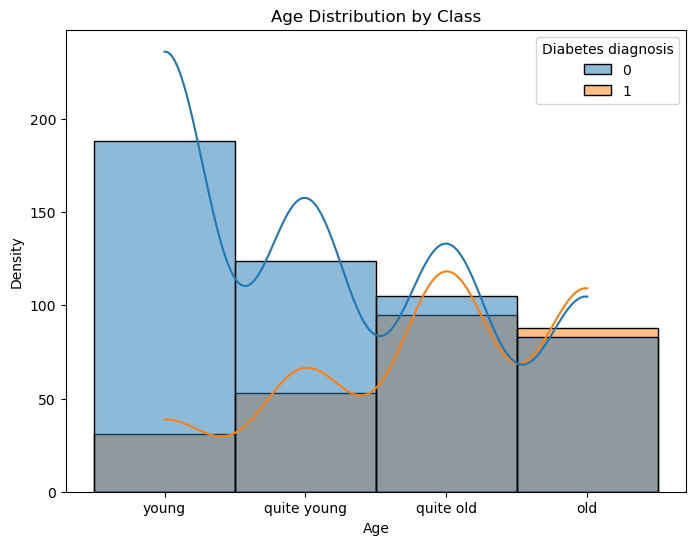

In [32]:
# Plot histograms or density plots of features grouped by class
for feature in df.columns[:-1]:  # Exclude the target column
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='Diabetes diagnosis', kde=True)
    plt.title(f'{feature} Distribution by Class')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

# Logistic Regression 3/3

In [33]:
logistic_classifier = LogisticRegression(random_state=0, max_iter=10000)

In [34]:
# Split the data into features (X) and target (y)
X = df_filtered[columns_to_check]
y = df_filtered['Diabetes diagnosis']

# Re-split the data after filtering and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Train the classifier on the scaled training data
logistic_classifier = logistic_classifier.fit(X_train_scaled, y_train)

In [36]:
# Get predictions on the test set
y_pred_logistic = logistic_classifier.predict(X_test_scaled)

In [37]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

In [38]:
print(f'Logistic Regression Accuracy: {accuracy_logistic:.2f}')
print(report_logistic)

Logistic Regression Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        46
           1       0.78      0.64      0.70        22

    accuracy                           0.82        68
   macro avg       0.81      0.77      0.79        68
weighted avg       0.82      0.82      0.82        68



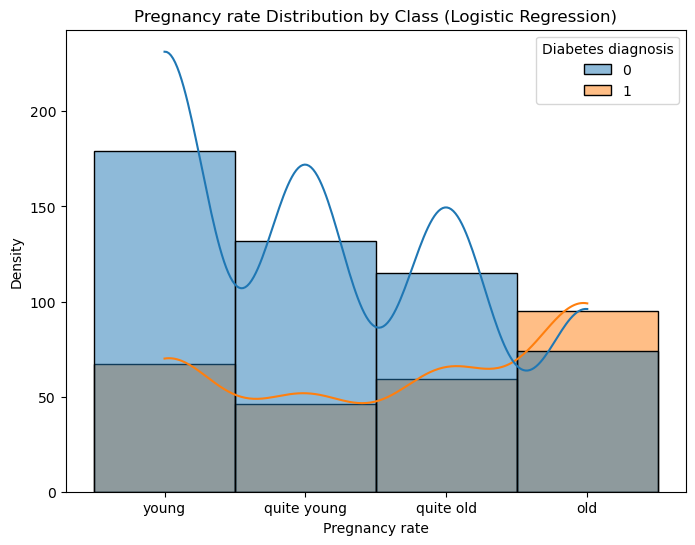

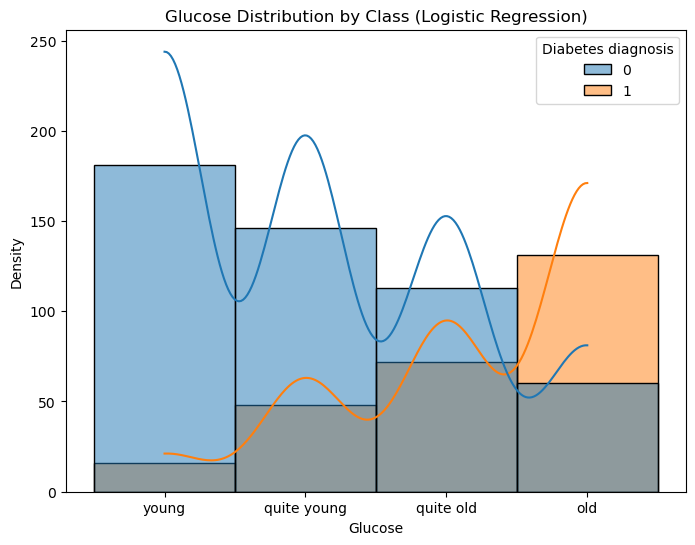

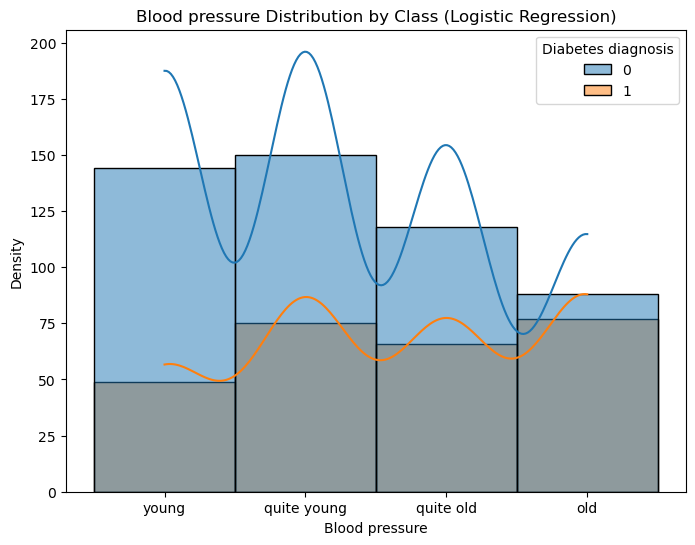

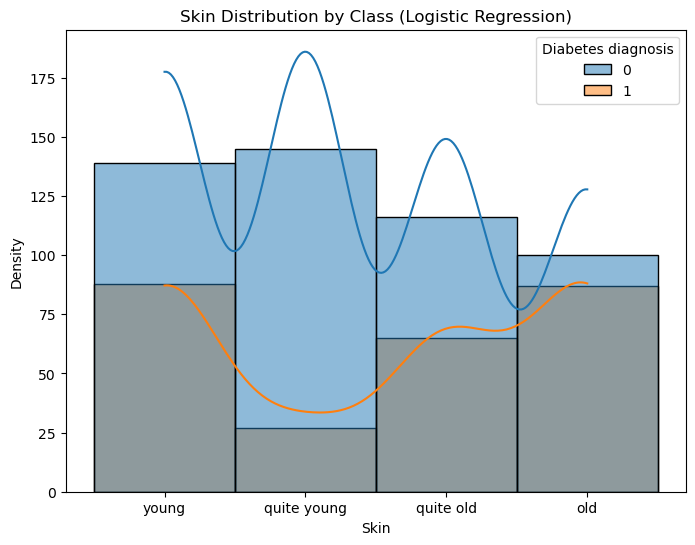

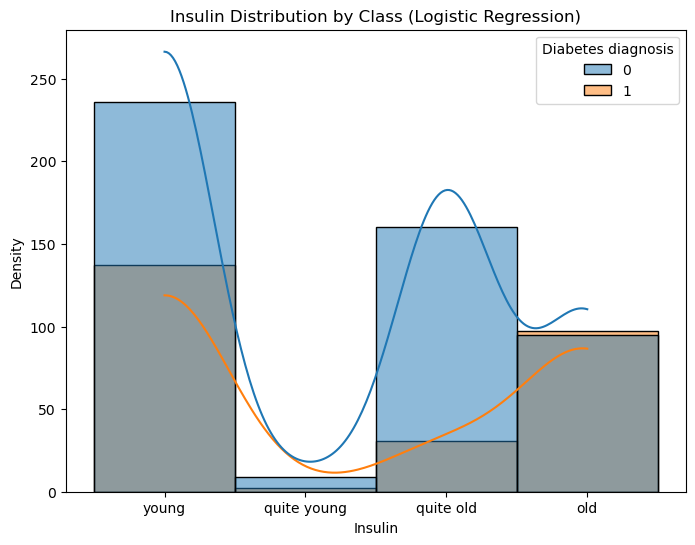

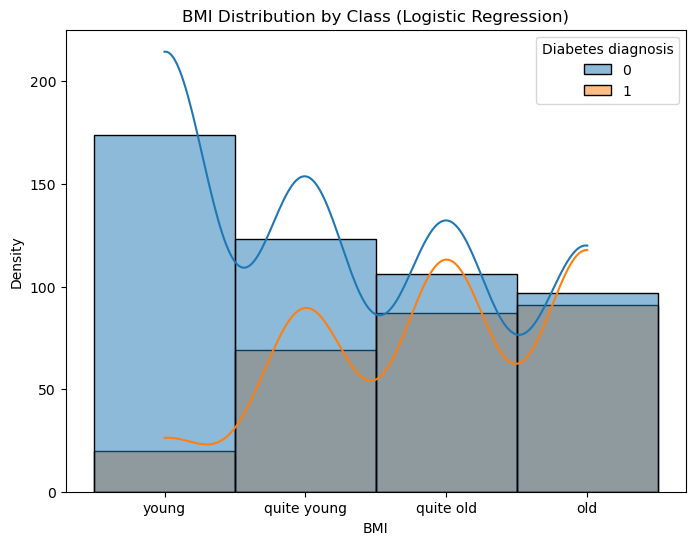

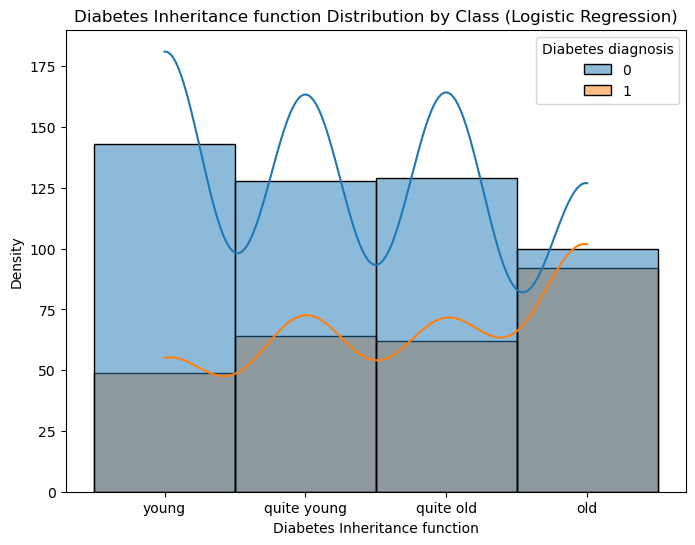

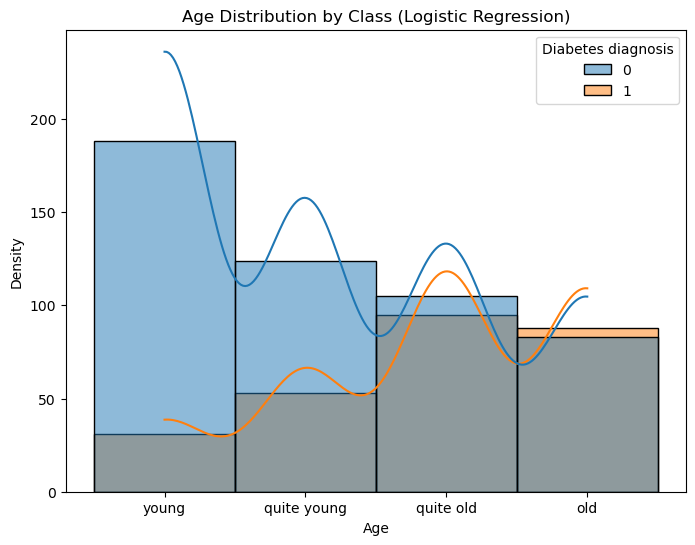

In [39]:
# Plot histograms or density plots of features grouped by class for logistic regression
for feature in df.columns[:-1]:  # Exclude the target column
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='Diabetes diagnosis', kde=True)
    plt.title(f'{feature} Distribution by Class (Logistic Regression)')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

# Conclusive thoughts
We have now ran all three algorithms using the basic parameters to see how well each performs on a specific dataset. 
In this case, it was a dataset with information about diabetes and its probable indicative features. 

We've looked at the correlation between the attributes and can see clearly that glucose levels are indicative of diabetes. 
Firstly, we considered if we should remove it or limit the amount of entries in the dataset. After some thought we decided that it might be best to leave as is. This is due to glucose being the number one feature used to diagnose diabetes. 

Not necessarily a conclusion, but worth mentioning; by adjusting the parameters and removing some features that might not have correlations to a diagnosis, we believe the accuracy could be greatly improved.

This task was solved by both Jens Vu Bogen and Tor Gunnar. We got approval by Jens' TA. 